In [537]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


### 1. Cargando los datos

#### 1.1. Se cargan los datos desde una url

- Son los datos procesados en el notebook 01 y guardados en el repositorio en GitHub:

In [538]:
url = "https://raw.githubusercontent.com/ArleyF/proyecto_enfermedades_cardiacas/master/dataset/heart_2020_modified.csv"
df = pd.read_csv(url)

#### 1.2. Se visualizan los datos

- Dataframe con los 10 primeros datos:

In [539]:
df.head(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,NaN,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,NaN,Yes,Very good,8.0,NaN,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,NaN,No,No


- Se muestran los tipos de datos de cada columna:


In [540]:
for c in df.columns:
    print ("%20s"%c, df[c].dtype)

        HeartDisease object
                 BMI float64
             Smoking object
     AlcoholDrinking object
              Stroke object
      PhysicalHealth float64
        MentalHealth float64
         DiffWalking object
                 Sex object
         AgeCategory object
                Race object
            Diabetic object
    PhysicalActivity object
           GenHealth object
           SleepTime float64
              Asthma object
       KidneyDisease object
          SkinCancer object


- Se determinan las columnas con datos numéricos:

In [541]:
df._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,291014.0,28.325882,6.360849,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,297410.0,7.097710,1.436270,1.00,6.00,7.00,8.00,24.00


### 2. Verificando datos faltantes

- Se visualizan los datos faltantes:

In [542]:
k = df.isna().sum()
k[k!=0]

BMI          28781
Diabetic     19187
SleepTime    22385
Asthma       28781
dtype: int64

- Se visualiza el porcentaje de datos faltantes:

In [543]:
# Porcentaje de datos faltantes
k = df.isna().sum()
((round(k[k!=0]/df.shape[0], 2) * 100).astype(int)).astype(str).str.cat(['' for i in range(len(k[k!=0]))], sep='%')

BMI          9%
Diabetic     6%
SleepTime    7%
Asthma       9%
dtype: object

- Se visualizan de manera gráfica los datos faltantes:

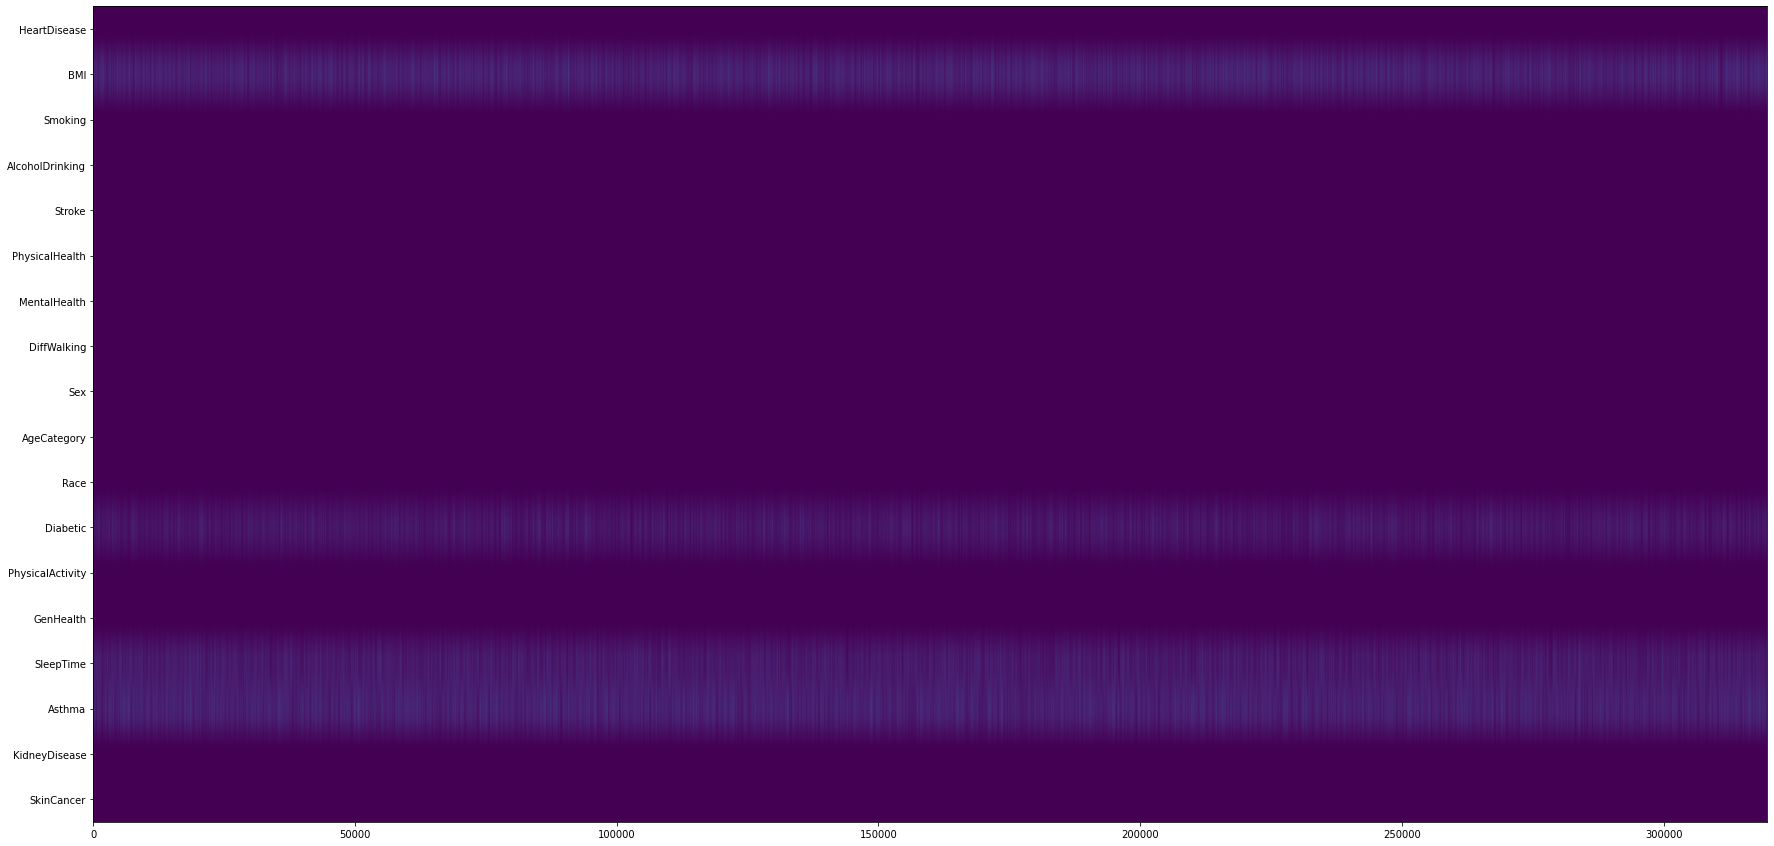

In [544]:
ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(df.isna().values.T)
ax.set_aspect('auto')
plt.yticks(range(df.shape[1]), df.columns);

##### Los datos faltantes corresponden a:
- **BMI**: Índice de masa corporal.
- **Diabetic**: Si la persona sufre de diabetes.
- **SleppTime**: Las horas de sueño que tiene la persona entre un rango de 24 horas.
- **Asthma***: Si la persona sufre de Asma


### 3. Verificando los tipos de datos

        Se analizan los datos faltantes para tomar decisiones que posteriormente se utilizarán para llenar esa información

#### 3.1. Se verifican los valores únicos de cada columna

In [545]:
df.nunique()


HeartDisease           2
BMI                 3546
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

        Se toma la decisión de rellenar los datos faltantes de la columna 'BMI' con el promedio de los datos.

#### 3.2. Se contabilizan las respuestas sobre el padecimiento de diabetes 'Diabetic'

In [546]:
df['Diabetic'].value_counts() 

No                         253474
Yes                         38405
No, borderline diabetes      6318
Yes (during pregnancy)       2411
Name: Diabetic, dtype: int64

    Debido a la cantidad de las respuestas 'No, borderline diabetes' y 'Yes (during pregnancy)': 
  - Se elige agregar las respuestas de 'No, borderline diabetes' a las respuestas con 'No'
  - Se elige agregar las respuestas de 'Yes (during pregnancy)' a las respuestas con 'Yes'
  - Luego se rellenan los datos faltantes con las respuestas 'Yes' y 'No' aleatoriamente

#### 3.3. Se contabilizan las respuestas sobre las horas de sueño 'SleepTime'

In [547]:
df['SleepTime'].value_counts() 

7.0     90880
8.0     90858
6.0     61993
5.0     17828
9.0     14919
10.0     7251
4.0      7182
12.0     2062
3.0      1863
2.0       742
1.0       516
11.0      389
14.0      223
16.0      221
15.0      179
18.0       97
13.0       88
20.0       56
24.0       28
17.0       20
22.0        7
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

        Se toma al decisión de rellenar los datos faltantes con el promedio de la columna 'SleepTime'

#### 3.4. Se contabilizan las respuestas de si padecen de Asma 'Asthma'

In [548]:
df['Asthma'].value_counts() 

No     252007
Yes     39007
Name: Asthma, dtype: int64

        Se decide rellenar los datos faltantes de la columna 'Asthma' con las respuestas 'Yes' y 'No' aleatoriamente

### 4. Limpieza de datos

#### 4.1  Se rellenan los datos vacios

- En la columna 'BMI' se saca la media de los datos (con dos decimales) y se guardan en los datos faltantes (NaN):

In [549]:
df['BMI'] = df['BMI'].replace(np.nan, round(df['BMI'].mean(), 2))

- En la columna 'Diabetic' se cambia las respuestas 'No, borderline diabetes' y 'Yes (during pregnancy)' por 'No' y 'Yes' respectivamente

In [550]:
df['Diabetic'] = df['Diabetic'].replace({'No, borderline diabetes':'No','Yes (during pregnancy)':'Yes' })

- En la columna 'Diabetic' se reemplazan los datos faltantes por 'Yes' y 'No' aleatoriamente

In [551]:
#Verificar indices vacios en la columna 'Diabetic'
df[df['Diabetic'].isnull()].index

Int64Index([     4,     12,     37,     40,     46,     49,     63,     67,
                74,     78,
            ...
            319628, 319634, 319660, 319661, 319706, 319711, 319717, 319735,
            319739, 319788],
           dtype='int64', length=19187)

In [552]:
i = 0
for cn in df['Diabetic']:
    if df.loc[i, 'Diabetic'] != df.loc[i, 'Diabetic']:
        df.loc[i, 'Diabetic'] = random.choice(['Yes', 'No'])
    i += 1

- En la columna 'SleepTime' se saca la media de los datos (sin decimales) y se guardan en los datos faltantes (NaN):

In [553]:
df['SleepTime'] = df['SleepTime'].replace(np.nan, round(df['SleepTime'].mean(), 0))

- En la columna 'Asthma' se reemplazan los datos faltantes por 'Yes' y 'No' de manera aleatoria:

In [554]:
i = 0
for cn in df['Asthma']:
    if df.loc[i, 'Asthma'] != df.loc[i, 'Asthma']:
        df.loc[i, 'Asthma'] = random.choice(['Yes', 'No'])
    i += 1
       

        Se verifica si quedaron datos faltantes:

In [555]:
k = df.isna().sum()
k[k!=0]

Series([], dtype: int64)

#### 4.2. Se reemplazan valores de texto a numéricos

- Los datos con respuetas de 'Yes' y 'No' se reemplazan por 1 y 0 respectivamente
- Se reemplazan en la columna 'Sex' las respuestas 'Male' y 'Female' por 1 y 0 respectivamente

In [556]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0})
df['Diabetic'] = df['Diabetic'].astype(int)

- Se contabilizan los datos de los cada valor único

In [557]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [558]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [559]:
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [560]:
le = preprocessing.LabelEncoder()

cols = ['AgeCategory', 'Race', 'GenHealth']
age_name = []
race_name = []
gh_name = []

for col in cols:
    df[col] = le.fit_transform(df[col])
    if df[col].name == 'AgeCategory':
        age_name = le.classes_
        print(le.classes_)
    if df[col].name == 'Race':
        race_name = le.classes_
        print(le.classes_)
    if df[col].name == 'GenHealth':
        gh_name = le.classes_
        print(le.classes_)
    
    


['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']


In [561]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,7.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,1,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,1,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,5,0,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0


<AxesSubplot:>

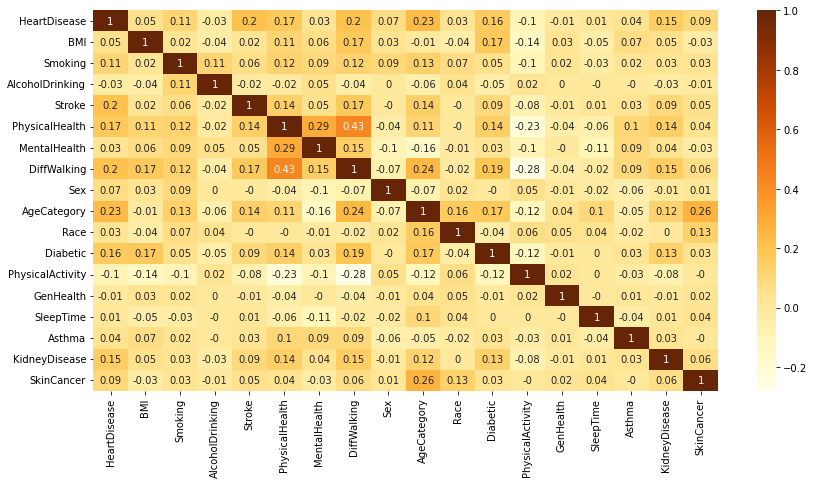

In [562]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [567]:
# OPCIONAL: Se guardan los cambios en un nuevo documento .csv
df.to_csv("dataset\heart_2020_cleaned.csv", index=False)
